In [2]:
#Подключение библиотек
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
#Загрузка данных
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#Просмотр набора данных
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [5]:
#Наименования классов
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"  ]

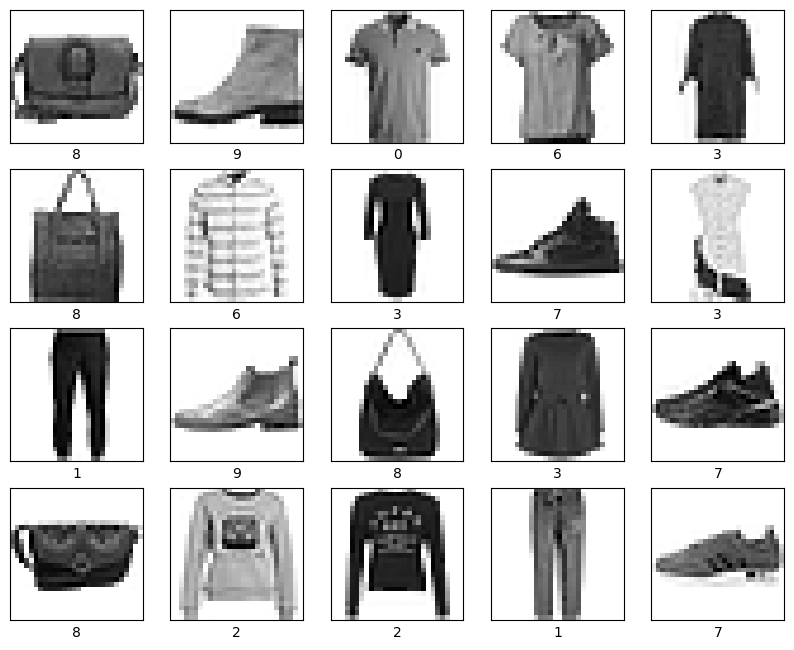

In [6]:
#Вывод части обучающих изображений и соответствующих им меток
image_number = random.randint(0, len(train_images) - 20)
plt.figure(figsize=(10,10))
for i in range(image_number, image_number + 20):
    plt.subplot(5,5,i-image_number + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

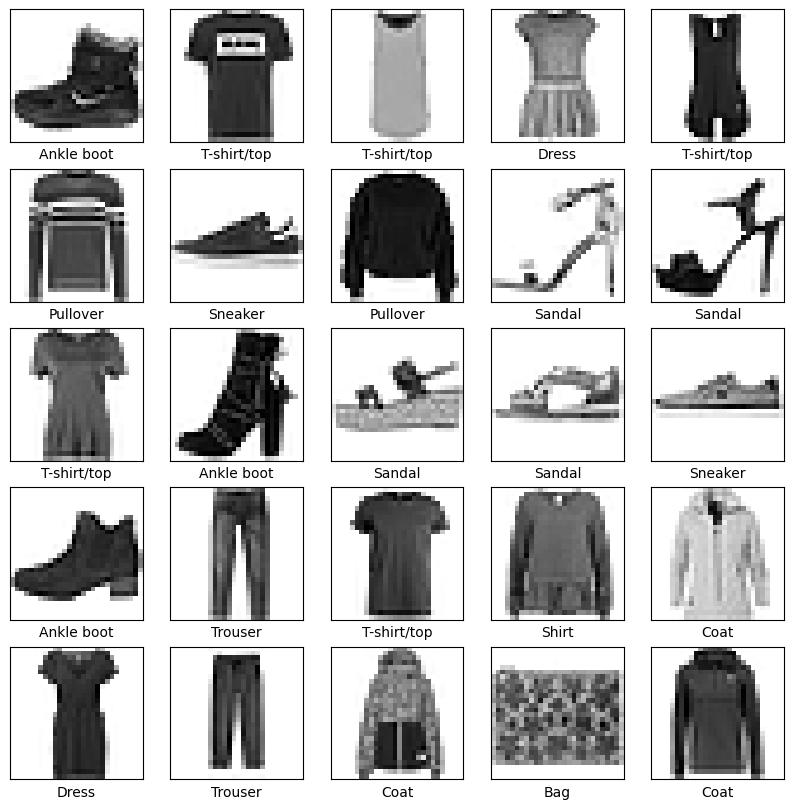

In [7]:
# Вывод изображений и наименовние классов соответственно
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [8]:
#Нормализация изображений
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
#Преобразование меток в one-hot кодировку целевой переменной
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

Определение архитектуры нейросети:


Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)) - это первый сверточный слой (Convolutional Layer). В этом случае, он имеет 32 фильтра размером 3x3, использует функцию активации ReLU и ожидает входные изображения размером 32x32 пикселей с 3 каналами (RGB).

BatchNormalization() - слой, который нормализирует входные данные. Нормализация применяет преобразование, которое поддерживает среднее выходное значение близким к 0, а стандартное отклонение выходного значения близким к 1.

Затем идет второй сверточный слой и слой, который нормализирует входные данные.После чего следует слой пулинга.

MaxPooling2D(2, 2) - слой пулинга (Pooling Layer) с размером окна 2x2, который уменьшает размерность изображения, упрощает вычисления. Следует после каждого сверточного слоя.

Dropout (0.3) - способ уменьшить переобучение. Это форма регуляризации, которая заставляет веса в сети принимать только малые значения, что делает распределение значений веса более регулярным, и сеть может уменьшить переобучение на небольших тренировочных примерах.

Когда вы применяете dropout к слою, он случайным образом выбрасывает (обнуляет) часть выходов из слоя в процессе обучения.

Затем идет повтор сверточных и пулинговых слоев (64 фильтра, 128 фильтров, 128 фильтров), что позволяет извлекать более абстрактные признаки из изображения.

Flatten() - После последнего пулингового слоя происходит выравнивание (Flatten) данных. Это преобразует многомерные данные в одномерный вектор, который будет входом для полносвязных слоев.

Dense(128, activation='relu') - Здесь добавляется полносвязный слой с 128 нейронами и функцией активации ReLU. Этот слой обрабатывает выровненные данные и выделяет более абстрактные признаки.

Dense(10, activation='softmax') - Последний слой с 10 нейронами и функцией активации softmax. Функция активации выходного слоя возвращает вероятность принадлежности экземпляра целевому классу.

In [11]:
#CNN
model = keras.Sequential()
model.add(layers.Conv2D(32, (1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (1, 1), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
#Просмотр слоев сети
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        64        
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        1056      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

In [13]:
from keras.optimizers import Adam

In [14]:
# Для этого обучающиго материала были выбраны оптимизатор ADAM и функция потерь категориальная кросс-энтропия.
# Чтобы оценить тренировочную и проверочные точности для каждой тренировочной эпохи нужно передать аргумент metrics.
model.compile(optimizer=keras.optimizers.Adam(0.0001),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [15]:
#Сохранение наилучшей модели:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Ранняя остановка - это тип обратного вызова в Keras, который завершает обучение, когда отслеживаемый показатель перестает улучшаться.
early_stop = EarlyStopping(monitor='val_accuracy', #Количество, подлежащее контролю.
                           patience=10, #Количество эпох без улучшений, после которых обучение будет прекращено
                           mode='max', #В режиме "max" обучение прекращается, когда контролируемое количество перестает увеличиваться.
                           verbose=1 #Режим детализации, 0 или 1. Режим 0 отключен, а режим 1 отображает сообщения, когда обратный вызов выполняет какое-либо действие.
                           )

checkpoint = ModelCheckpoint('lab_3-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                             monitor='val_accuracy', #Имя метрики для мониторинга
                             verbose=1, #Режим детализации, 0 или 1. Режим 0 — молчание, а режим 1 отображает сообщения, когда обратный вызов выполняет действие
                             save_best_only=True, #если save_best_only=True , он сохраняется только тогда, когда модель считается «лучшей»,
                                                 #и последняя лучшая модель в соответствии с отслеживаемым количеством не будет перезаписана
                             mode='max' # Если save_best_only=True, решение о перезаписи текущего файла сохранения принимается на основе максимизации
                             )

callbacks_list=[early_stop, checkpoint]

In [16]:
# Обучим модель разбив данные на "пакеты" размером "batch_size", и последовательно итерируя весь датасет заданное количество "эпох"
epochs = 100
history = model.fit(train_images,
                    train_labels,
                    epochs=epochs,
                    batch_size=128,
                    validation_data=(test_images, test_labels),
                    callbacks=callbacks_list
                    )

Epoch 1/100
465/469 [============================>.] - ETA: 0s - loss: 2.2885 - accuracy: 0.3206
Epoch 1: val_accuracy improved from -inf to 0.25380, saving model to lab_3-01-0.254.hdf5
469/469 [==============================] - 21s 24ms/step - loss: 2.2824 - accuracy: 0.3217 - val_loss: 2.4270 - val_accuracy: 0.2538
Epoch 2/100
  6/469 [..............................] - ETA: 5s - loss: 1.5059 - accuracy: 0.4987

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


465/469 [============================>.] - ETA: 0s - loss: 1.2992 - accuracy: 0.5546
Epoch 2: val_accuracy improved from 0.25380 to 0.57110, saving model to lab_3-02-0.571.hdf5
469/469 [==============================] - 6s 12ms/step - loss: 1.2979 - accuracy: 0.5552 - val_loss: 1.1665 - val_accuracy: 0.5711
Epoch 3/100
465/469 [============================>.] - ETA: 0s - loss: 1.0526 - accuracy: 0.6276
Epoch 3: val_accuracy improved from 0.57110 to 0.60460, saving model to lab_3-03-0.605.hdf5
469/469 [==============================] - 6s 13ms/step - loss: 1.0507 - accuracy: 0.6282 - val_loss: 0.9913 - val_accuracy: 0.6046
Epoch 4/100
468/469 [============================>.] - ETA: 0s - loss: 0.9325 - accuracy: 0.6629
Epoch 4: val_accuracy improved from 0.60460 to 0.65130, saving model to lab_3-04-0.651.hdf5
469/469 [==============================] - 6s 12ms/step - loss: 0.9324 - accuracy: 0.6629 - val_loss: 0.8897 - val_accuracy: 0.6513
Epoch 5/100
465/469 [============================

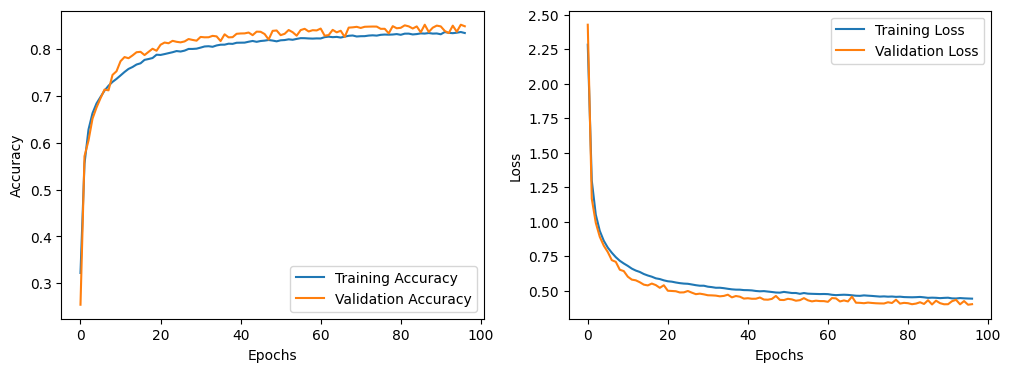

In [17]:
#Визуализация результатов обучения после обучения сети
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
#Предсказание
predict = model.predict(test_images)
predict

313/313 [==============================] - 1s 2ms/step


array([[2.90270890e-07, 1.13504507e-06, 1.83510451e-07, ...,
        1.73436757e-02, 6.84867837e-06, 9.72753763e-01],
       [1.10094184e-02, 3.17049876e-06, 9.80158389e-01, ...,
        3.71010287e-07, 2.67945034e-05, 1.75067180e-06],
       [1.28100135e-08, 9.99999762e-01, 3.63887693e-08, ...,
        1.55158153e-09, 8.19834511e-09, 5.45133929e-08],
       ...,
       [9.83228460e-07, 6.55278998e-10, 3.13734372e-09, ...,
        4.20378010e-10, 9.99954104e-01, 2.35933650e-09],
       [1.21215848e-07, 9.99914646e-01, 5.79890873e-08, ...,
        1.32119675e-08, 6.06022013e-07, 4.48854820e-09],
       [7.99754052e-05, 3.67830507e-05, 5.24688585e-05, ...,
        8.92898381e-01, 1.37201436e-02, 1.15560768e-02]], dtype=float32)

In [19]:
#Переводим предсказания в метки классов
predict_class = np.argmax(predict, axis=1)
predict_class

array([9, 2, 1, ..., 8, 1, 7])

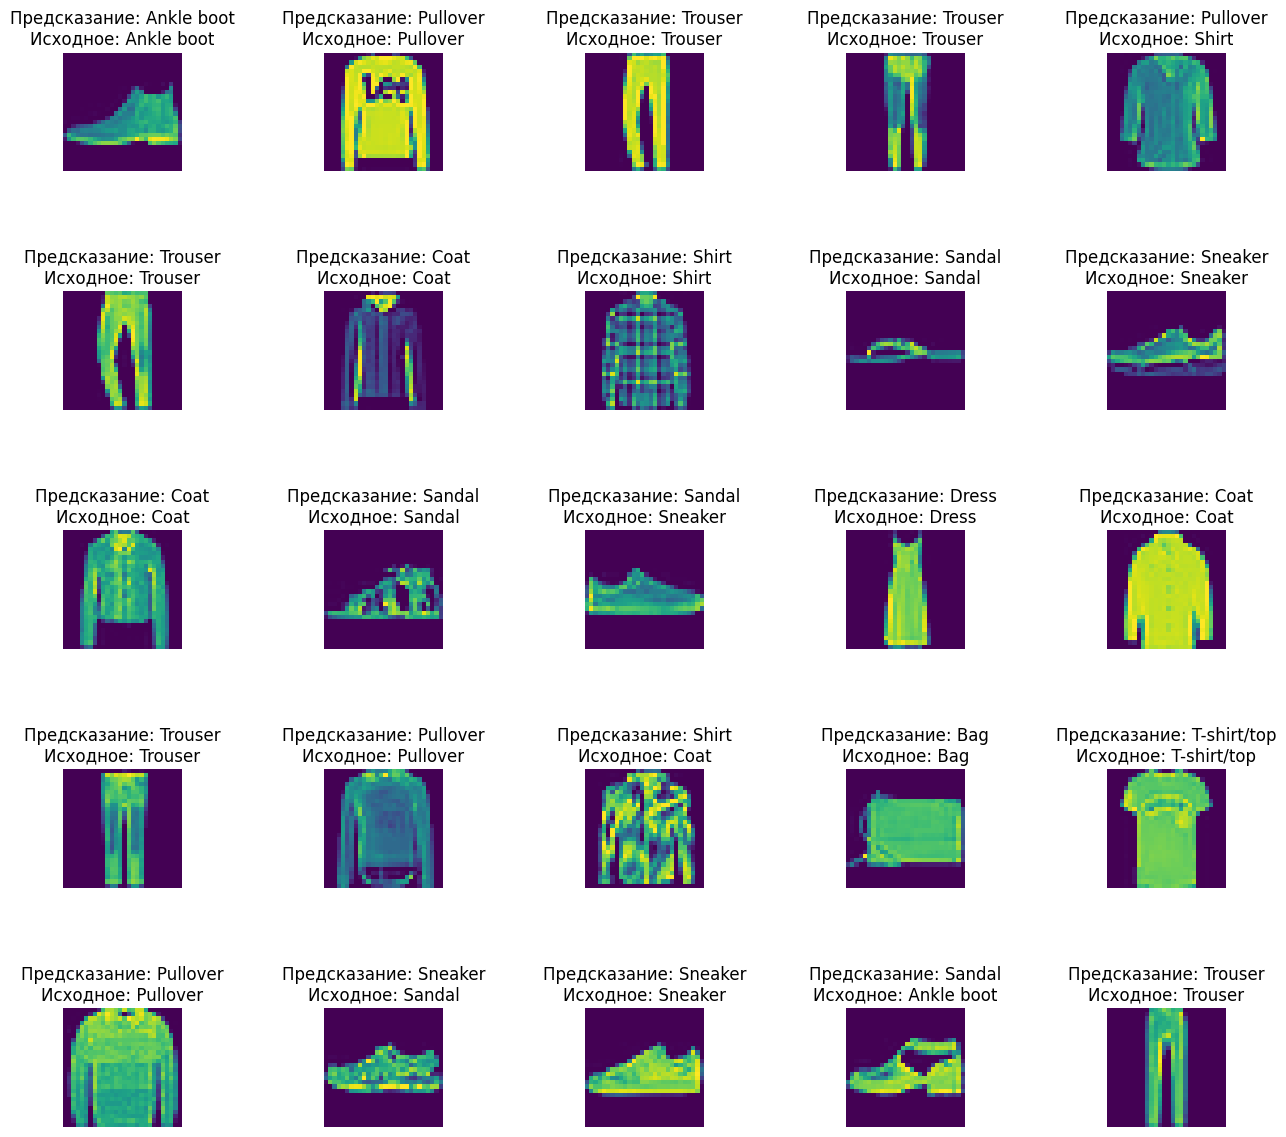

In [20]:
#Прогноз
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

start = 0
end = start + 25
for i in np.arange(start, end):
    axes[i - start].imshow(test_images[i])
    axes[i - start].set_title(f"Предсказание: {class_names[predict_class[i]]}\nИсходное: {class_names[np.argmax(test_labels[i])]}")
    axes[i - start].axis("off")
    plt.subplots_adjust(wspace=1.2)